In [ ]:
from bs4 import BeautifulSoup as BS
import re

# 正则表达式进行匹配
def getText(match,text,group=1):
	tmp=re.search(match,text,re.S)
	if (tmp==None):
		return ""
	else:
		return tmp.group(group)

def get(html):
	soup=BS(html,"html.parser")
	shuoshuos=soup.find_all(name="li",attrs={"class":"f-single f-s-s"})
	for i in range(len(shuoshuos)):
		shuoshuo = shuoshuos[i]

		# 提取用户和时间
		user = shuoshuo.find("a", class_="f-name").get_text()
		time = getText(r"(\d\d:\d\d)", shuoshuo.find("span", class_="state").get_text())

		# 提取浏览次数 llcs
		llcs = 0
		llcs_match = shuoshuo.find("a", class_="state qz_feed_plugin")
		if llcs_match:
			llcs_text = llcs_match.get_text()
			llcs = int(getText(r"浏览(\d+)次", llcs_text))
			print(llcs)

		# 提取点赞用户和点赞次数
		like_info = shuoshuo.find("div", class_="f-like-list")
		haoyou = []
		likes=0
		if like_info:
			haoyou = [a.get_text() for a in like_info.find_all("a", class_="item q_namecard")]
			likes_match = like_info.find("span", class_="f-like-cnt")
			if likes_match:
				if likes_match:
					likes_text = likes_match.get_text()
					likes = int(re.search(r'\d+', likes_text).group())

		content_text=""
		# 提取说说内容
		content = shuoshuo.find("div", class_="f-single-content").find("div", class_="f-info")
		if content:
			content_text = content.get_text().strip()

		# 构造字典
		dic = {"user": user, "time": time, "llcs": llcs, "haoyou": haoyou, "likes": likes, "content": content_text}

		# 在data文件夹下面保存
		with open("data/{}_{}.txt".format(user, time.replace(":", "")), "w", encoding="utf-8") as f:
			f.write(str(dic))


In [1]:

from selenium.webdriver import Edge
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import jiexi
import pyautogui
driver = Edge()
# yourqq写你的QQ号
driver.get("https://user.qzone.qq.com/2319109590/infocenter")
time.sleep(10) #在这10s内你要人工登录
for i in range(10000):
	time.sleep(1)
	# 使用 WebDriverWait 来等待元素出现
	element = WebDriverWait(driver, 10).until(
		EC.presence_of_element_located((By.XPATH, "//*"))
	)

	html = element.get_attribute("outerHTML")
	# 解析html
	jiexi.get(html)
	pyautogui.scroll(-7500)
	# 向下滑动
	# time.sleep(1)
driver.close()


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: MicrosoftEdge=119.0.2151.93)
Stacktrace:
	GetHandleVerifier [0x00007FF7FAEC2602+60402]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF7FAE47352+253698]
	(No symbol) [0x00007FF7FAC19C99]
	(No symbol) [0x00007FF7FABF0C14]
	(No symbol) [0x00007FF7FAC8FEAD]
	(No symbol) [0x00007FF7FACA4A78]
	(No symbol) [0x00007FF7FAC8B863]
	(No symbol) [0x00007FF7FAC5C585]
	(No symbol) [0x00007FF7FAC5B993]
	(No symbol) [0x00007FF7FAC5CD14]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF7FB0A34A4+1161924]
	(No symbol) [0x00007FF7FACDE5F6]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF7FAD9B083+37459]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF7FAD92C4D+3613]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF7FB0A21E4+1157124]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF7FAE516A8+295512]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF7FAE4CB74+276260]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF7FAE4CCA2+276562]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF7FAE3FA91+222785]
	BaseThreadInitThunk [0x00007FFFA55A53E0+16]
	RtlUserThreadStart [0x00007FFFA6B6485B+43]


In [ ]:
import glob
filelist=glob.glob("data/*.txt")
dic={};
for file in filelist:
	with open(file,"r",encoding="utf-8") as f:
		d=eval(f.read())
		if (dic.get(d["user"])==None):
			dic[d["user"]]={}
		for haoyou in d["haoyou"]:
			if dic[d["user"]].get(haoyou)==None:
				dic[d["user"]][haoyou]=1
			else:
				dic[d["user"]][haoyou]=dic[d["user"]][haoyou]+1
l = []
for key in dic:
	if key == '':
		continue
	for key2 in dic[key]:
		if key2 == "":
			continue
		l.append([key,key2,dic[key][key2]])
		#key 收到 key2 dic[key][key2] 次点赞
with open("list.txt","w",encoding="utf-8") as f:
	f.write(str(l))


In [3]:
!pip install pyecharts

In [7]:
#  QQ空间解析/visualization.py
from pyecharts.charts.basic_charts.graph import Graph
links = []
nodes = []
with open("list.txt","r",encoding="utf-8") as f:
    tmp = eval(f.read())
    dic = {}
    for item in tmp:
        dic[item[0]] = dic.get(item[0],1) + item[2]
        dic[item[1]] = dic.get(item[1],1)
        links.append({"source":item[1],"target":item[0],"value":item[2]})
    for key in dic:
        nodes.append({"name":key,"symbolSize": (dic.get(key,1)+9)//10,"value":dic[key]})

graph = Graph()
graph.add("",nodes,links,
        categories=None, # 结点分类的类目，结点可以指定分类，也可以不指定。
        is_focusnode=False, # 是否在鼠标移到节点上的时候突出显示节点以及节点的边和邻接节点。默认为 True
        is_roam=True,
          )
graph.render(r"QQ点赞关系图.html")


'C:\\Users\\xlc\\PycharmProjects\\qq\\QQ点赞关系图.html'

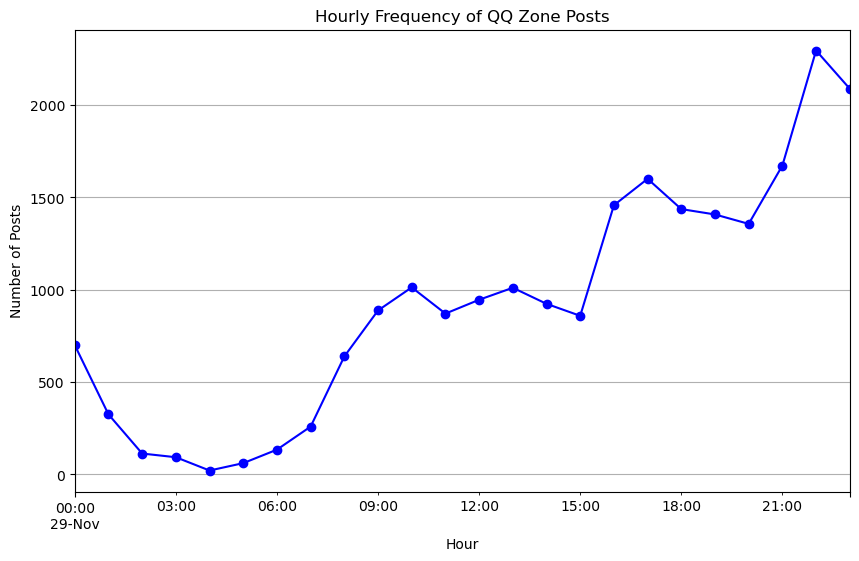

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 读取 data 文件夹中的所有文件
data_folder = "data"
all_files = os.listdir(data_folder)

# 创建一个空的 DataFrame
df = pd.DataFrame(columns=["user", "time", "llcs", "haoyou", "likes", "content"])

# 从每个文件中读取数据并添加到 DataFrame 中
for file in all_files:
    with open(os.path.join(data_folder, file), "r", encoding="utf-8") as f:
        data = eval(f.read())
        df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)

# 将时间列转换为 datetime 类型
df["time"] = pd.to_datetime(df["time"])

# 设置时间为索引
df.set_index("time", inplace=True)

# 按小时进行分组，并计算每个小时的说说数量
hourly_counts = df.resample("H").count()["user"]

# 绘制折线图
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind="line", marker="o", linestyle="-", color="b")
plt.title("Hourly Frequency of QQ Zone Posts")
plt.xlabel("Hour")
plt.ylabel("Number of Posts")
plt.grid(True)
plt.show()


时间段： 2023-11-29 22:00:00
点赞总数： 116675


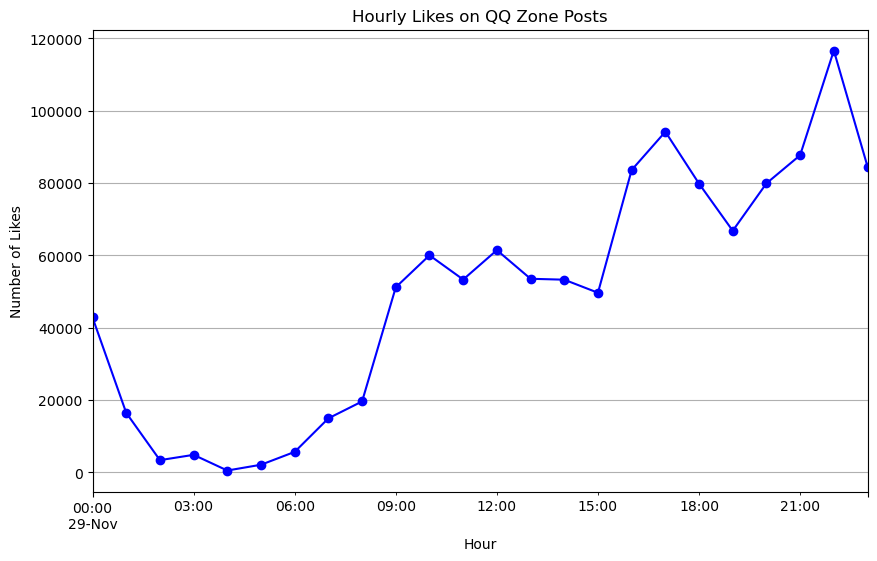

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 读取 data 文件夹中的所有文件
data_folder = "data"
all_files = os.listdir(data_folder)

# 创建一个空的 DataFrame
df = pd.DataFrame(columns=["user", "time", "llcs", "haoyou", "likes", "content"])

# 从每个文件中读取数据并添加到 DataFrame 中
for file in all_files:
    with open(os.path.join(data_folder, file), "r", encoding="utf-8") as f:
        data = eval(f.read())
        df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)

# 将时间列转换为 datetime 类型
df["time"] = pd.to_datetime(df["time"])

# 设置时间为索引
df.set_index("time", inplace=True)

# 按小时进行分组，并计算每个小时的点赞总数
hourly_likes = df.resample("H").sum()["likes"]

# 找到获得最高 likes 的时间段
top_likes_time = hourly_likes.idxmax()

# 打印结果
print("时间段：", top_likes_time)
print("点赞总数：", hourly_likes[top_likes_time])

# 绘制折线图
plt.figure(figsize=(10, 6))
hourly_likes.plot(kind="line", marker="o", linestyle="-", color="b")
plt.title("Hourly Likes on QQ Zone Posts")
plt.xlabel("Hour")
plt.ylabel("Number of Likes")
plt.grid(True)
plt.show()
